# Tutorial of HiPIMS 3.0
Author: Jiaheng Zhao

Date: 21.06.2020

## 1. Preparation

It is possible to run the model on online interative notebook (cloud computing platform: colab, Binder, Kaggle Kernels, ....), but we will focus on how to run the model in HemLab server today.

> 1.1 Text editor: 

>> VScode insider: https://code.visualstudio.com/insiders/

>> nessary plugins: 

>>> - python
>>> - Remote Development
>>> - Git
>>> - terminal
>>> - vscode-cudacpp

> 1.2 Package manager:

>> Anaconda will be choose as the package manager in HiPIMS 3.0:

>> Open the termianl inside your vscode:
>>> - cd /tmp
>>> - curl –O https://repo.anaconda.com/archive/Anaconda3-2020.02-Linux-x86_64.sh
>>> - bash Anaconda3-2020.02-Linux-x86_64.sh

> 1.3 Change the default CUDA version of your environment:

>>> vi ~/.bashrc
>>> here is a vi editor:
>>>> - press "i" to enable the insert function
>>>> - move to the bottom of your bashrc file
>>>> - copy this two lines to your file:

>>>> export PATH=/usr/local/cuda-10.0/bin:\$PATH

>>>> export LD_LIBRARY_PATH=/usr/local/cuda-10.0/lib64:/usr/local/lib:\$LD_LIBRARY_PATH

>>>> - press escape button "Esc"
>>>> - press ":" and then "wq" to save it

> 1.4 Creat and activate an anaconda environment for you model (this is very important, keep you environment light and clean, please keep this habit for your future work) 

>> conda create --name torch_hipims python=3.7 (the name you can choose as you like)
>> conda activate torch_hipims (please remember this step is needed for your future work when you when to use your environment)

> 1.5 install the nessary packages:

>> - conda install pytorch==1.2.0 torchvision==0.4.0 cudatoolkit=10.0 -c pytorch
>> - conda config --add channels conda-forge 
>> - conda install numpy matplotlib pyqt seaborn tqdm kiwisolver
>> - conda install rasterio pysal pyproj rasterstats geopy cartopy contextily earthpy folium geojson mapboxgl hydrofunctions geocoder tweepy


## 2. Test your packages

In [1]:
import torch
print(torch.__version__)

ModuleNotFoundError: No module named 'torch'

In [2]:
torch.cuda.device_count()

4

## 3. Build your lib

> - cd hipims/cuda/

> - python setup.py install



## 4. You have the HiPIMS 3.0 now!!! ✿✿ヽ(°▽°)ノ✿

## 5. Run your first case

### 5.1 import all the package you need


Change the work directory to your code path

In [3]:
%cd /home/cvjz3/Dive-into-DL-PyTorch/code/torch_hipims_2.0/hipimsTorch/hipims_hybrid

/home/cvjz3/Dive-into-DL-PyTorch/code/torch_hipims_2.0/hipimsTorch/hipims_hybrid


In [4]:
import os
import torch
import numpy as np
from hipims.pythonHipims import CatchFlood_main as catchFlood

Welcome to the HiPIMS  1.0.0

    @author: Jiaheng Zhao
    @license: (C) Copyright 2020-2025. 2025~ Apache Licence 2.0
    @contact: j.zhao@lboro.ac.uk 
    @software: hipims_torch
    @file: __init__.py
    @time: 07.01.2020
      

██╗  ██╗███████╗███╗   ███╗██╗      █████╗ ██████╗ 
██║  ██║██╔════╝████╗ ████║██║     ██╔══██╗██╔══██╗
███████║█████╗  ██╔████╔██║██║     ███████║██████╔╝
██╔══██║██╔══╝  ██║╚██╔╝██║██║     ██╔══██║██╔══██╗
██║  ██║███████╗██║ ╚═╝ ██║███████╗██║  ██║██████╔╝
╚═╝  ╚═╝╚══════╝╚═╝     ╚═╝╚══════╝╚═╝  ╚═╝╚═════╝ 
    ██╗  ██╗██╗██████╗ ██╗███╗   ███╗███████╗      
    ██║  ██║██║██╔══██╗██║████╗ ████║██╔════╝      
    ███████║██║██████╔╝██║██╔████╔██║███████╗      
    ██╔══██║██║██╔═══╝ ██║██║╚██╔╝██║╚════██║      
    ██║  ██║██║██║     ██║██║ ╚═╝ ██║███████║      
    ╚═╝  ╚═╝╚═╝╚═╝     ╚═╝╚═╝     ╚═╝╚══════╝      


*Set your work directory*

In [5]:
CASE_PATH = os.path.join(os.environ['HOME'], 'Luanhe_case')

*Provide the raster data path*

In [6]:
RASTER_PATH = os.path.join(CASE_PATH, 'Luan_Data_90m')

*output path*

In [7]:
OUTPUT_PATH = os.path.join(CASE_PATH, 'tutorial')

*Your rianfall data path*

In [8]:
Rainfall_data_Path = os.path.join(CASE_PATH, 'rainSource.txt')

*All the soil property are stored in array like value, the landuse mask will be used for categorizing the values*

In [9]:
Manning = np.array([0.035, 0.1, 0.035, 0.04, 0.15, 0.03])

*Degree: a coefficient for distinguising the raster data, if it is true, the code will transfer it to meter automatically*

In [10]:
Degree = True

*gauges_position, an array liked data for storing the x,y coordinate of the measurement gauges (e.g. gauges_position = np.array(\[ 1, 0 \], \[ 4, 5 \]))*

In [11]:
gauges_position = np.array([])

*boundary cell are similiarly treated as the HiPIMS 2.0, use the box to cover the boundary cells, (e.g. boundBox = np.array(\[$x_{lb}$, $y_{lb}$, $x_{ru}$, $y_{ru}$\], \[,.,.,.,.,\]))*

*bc_type = np.array([]), should correspondingly set with your box*

*it is possible to set them with a single data structure (dict), but I am lazy.....*

*The default boundary is set to be open boundary with a constant water depth 0, discharge 0*

*-WALL_NON_SLIP = 3*

*-WALL_SLIP = 4*

*-OPEN = 5*

*-HQ_GIVEN = 6*


In [12]:
boundBox = np.array([])
bc_type = np.array([])

In [13]:
rasterPath = {
        'DEM_path': os.path.join(RASTER_PATH, 'DEM.tif'),
        'Landuse_path': os.path.join(RASTER_PATH, 'Landuse.tif'),
        'Rainfall_path': os.path.join(RASTER_PATH, 'RainMask.tif')
    }

*landLevel is used for which layer of land use data you want to use, if 1 is specified: (12->1)*

In [14]:
landLevel = 1

*Finally we reach to the end parameter setting*

In [15]:
paraDict = {
        'deviceID': 1,
        'dx': 90.,
        'CFL': 0.5,
        'Manning': Manning,
        'Export_timeStep': 2. * 3600.,        
        't': 0.0,
        'export_n': 0,
        'secondOrder': False,
        'firstTimeStep': 1.0,
        'tensorType': torch.float64,
        'EndTime': 10. * 3600.,        
        'Degree': Degree,
        'OUTPUT_PATH': OUTPUT_PATH,
        'rasterPath': rasterPath,
        'gauges_position': gauges_position,
        'boundBox': boundBox,
        'bc_type': bc_type,
        'landLevel': landLevel,
        'Rainfall_data_Path': Rainfall_data_Path
    }

Run you case

*Here is just an example, do not run your case in this note book, but go to your model folder, type "python singlrGPU_example.py"*

**if you run it here, the process will not end even the simulation has already been finished**

In [16]:
catchFlood.run(paraDict)

8990124
32090.356748043385
32095.670499159674
32100.984243838106
32106.2979815043
32111.611712165115
32116.92543640864
32122.2391536606
32127.55286392795
32132.866567798876
32138.1802646992
32143.493955217167
32148.807638778664
32154.121315971992
32159.4349862231
32164.748650120342
32170.062307089735
32175.3759571385
32180.689600855076
32186.003238246733
32191.316869320777
32196.630493503362
32201.94411138302
32207.25772238596
32212.571327100755
32217.88492495367
32223.19851653332
32228.512101847187
32233.8256803216
32239.13925254524
32244.45281852565
32249.76637768923
32255.079930624725
32260.393477339734
32265.70701784188
32271.020552138805
32276.33407965701
32281.647600985325
32286.96111613145
32292.274625103095
32297.588127907984
32302.901624553866
32308.21511446735
32313.528598237364
32318.84207645284
32324.15554795929
32329.469013345682
32334.782472619845
32340.095925789625
32345.40937286288
32350.722814428613
32356.036249332432
32361.349678163366
32366.663100929316
32371.9765182

*see your result?*

*copy it via **winscp** to your local machine, visual it vis gis tool*

MAC user? ssh please

do not know how to use ssh?

In [17]:
# Import necessary packages
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask

# Package created for the earth analytics program
import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

In [18]:
h_max_path = os.path.join(OUTPUT_PATH,'h_max_36000.tif')
with rio.open(h_max_path) as src:
    h_max = src.read(1, masked = True)
    h_max_extent = rio.plot.plotting_extent(src)


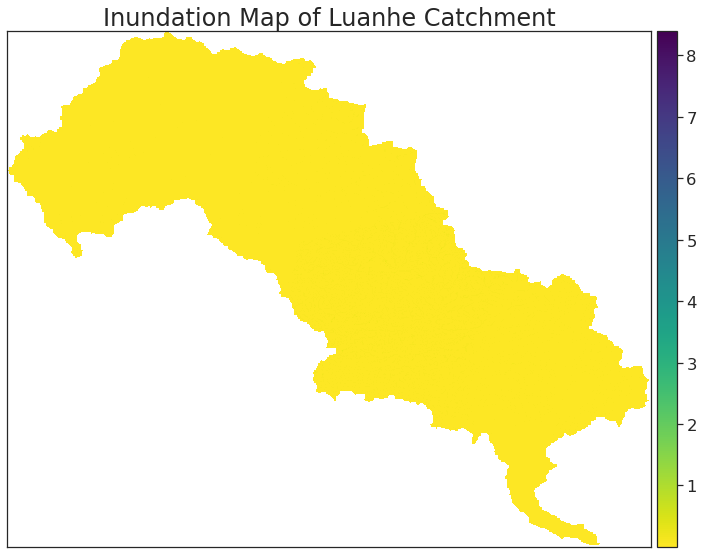

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))
ep.plot_bands(h_max,
              cmap = 'viridis_r',
              extent=h_max_extent,
              scale=False,
              ax=ax)
ax.set_title("Inundation Map of Luanhe Catchment", 
             fontsize=24)
plt.show()

In [20]:
h_max_path = os.path.join(OUTPUT_PATH,'wl_36000.tif')
with rio.open(h_max_path) as src:
    h_max = src.read(1, masked = True)
    h_max_extent = rio.plot.plotting_extent(src)

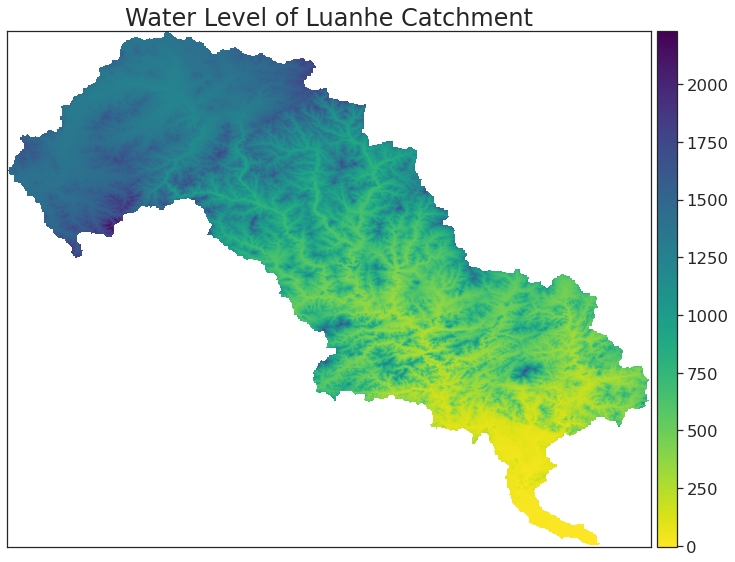

In [22]:
fig, ax = plt.subplots(figsize=(12, 10))
ep.plot_bands(h_max,
              cmap = 'viridis_r',
              extent=h_max_extent,
              scale=False,
              ax=ax)
ax.set_title("Water Level of Luanhe Catchment", 
             fontsize=24)
plt.show()

All the settings in multiGPU are similiar with single GPU.